In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
attributeToAnalyze = 'BodyFat'

In [3]:
pathToTestingMetricF1 = 'RAPzs/testing_dict_instance_f1.json'
pathToSave = 'RAPzs/'
pathToTestingDataGTPredicted = 'RAPzs/testing_dict_gt_predicted.json'

listAttributesRAPv2 = ['hs-BaldHead', 'hs-LongHair', 'hs-BlackHair', 'hs-Hat', 'hs-Glasses','ub-Shirt','ub-Sweater','ub-Vest','ub-TShirt','ub-Cotton','ub-Jacket','ub-SuitUp','ub-Tight','ub-ShortSleeve','ub-Others','lb-LongTrousers','lb-Skirt','lb-ShortSkirt','lb-Dress','lb-Jeans','lb-TightTrousers','shoes-Leather', 'shoes-Sports', 'shoes-Boots', 'shoes-Cloth', 'shoes-Casual', 'shoes-Other','attachment-Backpack','attachment-ShoulderBag','attachment-HandBag','attachment-Box','attachment-PlasticBag','attachment-PaperBag','attachment-HandTrunk','attachment-Other','AgeLess16', 'Age17-30', 'Age31-45', 'Age46-60','Female','BodyFat','BodyNormal','BodyThin','Customer','Employee','action-Calling','action-Talking','action-Gathering','action-Holding','action-Pushing','action-Pulling','action-CarryingByArm','action-CarryingByHand','action-Other']
listAttributesRAPzs = listAttributesRAPv2

listAttributesRAPzs.remove('Age46-60')

columnsDF = ['value F1', 'nameImg']
columnsDF.extend(listAttributesRAPzs)

fileTestingGTPredicted = open(pathToTestingDataGTPredicted)
jsonTestingGTPredicted = json.load(fileTestingGTPredicted)


fileTestingMetricF1 = open(pathToTestingMetricF1)
jsonTestingMetricF1 = json.load(fileTestingMetricF1)

values = jsonTestingMetricF1['testing f1']

listNames = []
for list in jsonTestingMetricF1['img name testing']:
    for item in list:
        listNames.append(item)

dfTestingRAPzs = pd.DataFrame()
dfTestingRAPzs['values'] = values
dfTestingRAPzs['name'] = listNames

In [4]:
indexOFAttribute = listAttributesRAPzs.index(attributeToAnalyze)

In [5]:
columnsDFGT = [item + ' gt' for item in listAttributesRAPzs]
columnsDFPred= [item + ' pred' for item in listAttributesRAPzs]
columnsDF = columnsDFGT + columnsDFPred



In [6]:
valuesGTTesting = jsonTestingGTPredicted['testing gt']
valuesPredictedTestingOld = jsonTestingGTPredicted['testing predicted']

dictTestingGTPredicted = dict.fromkeys(columnsDF)

for column in columnsDFGT:
    dictTestingGTPredicted[column] = [int(vector[columnsDFGT.index(column)]) for vector in valuesGTTesting]

for column in columnsDFPred:
    dictTestingGTPredicted[column] = [int(vector[columnsDFPred.index(column)]) for vector in valuesPredictedTestingOld]

dfTestingRAPzsIdentitites = pd.DataFrame.from_dict(dictTestingGTPredicted)
dfTestingRAPzsIdentitites['values'] = values
dfTestingRAPzsIdentitites['name'] = listNames

In [7]:
dfTestingRAPzsIdentititesTP = dfTestingRAPzsIdentitites[(dfTestingRAPzsIdentitites[attributeToAnalyze+' gt']==1) & (dfTestingRAPzsIdentitites[attributeToAnalyze+' pred']==1)]

In [8]:
len(dfTestingRAPzsIdentititesTP)

220

In [9]:
dfTestingRAPzsIdentititesFN = dfTestingRAPzsIdentitites[(dfTestingRAPzsIdentitites[attributeToAnalyze+' gt']==1) & (dfTestingRAPzsIdentitites[attributeToAnalyze+' pred']==0)]

In [10]:
len(dfTestingRAPzsIdentititesFN)

546

In [11]:
dfTestingRAPzsIdentititesFP = dfTestingRAPzsIdentitites[(dfTestingRAPzsIdentitites[attributeToAnalyze+' gt']==0) & (dfTestingRAPzsIdentitites[attributeToAnalyze+' pred']==1)]

In [12]:
len(dfTestingRAPzsIdentititesFP)

331

In [13]:
def calculateF1Metric(columnsToCalculate, df):
    listF1 = []
    for column in columnsToCalculate:
        tp = len(df[(df[column+' gt']==1) & (df[column+' pred']==1)])
        fp = len(df[(df[column+' gt']==0) & (df[column+' pred']==1)])
        fn = len(df[(df[column+' gt']==1) & (df[column+' pred']==0)])
        
        if (tp + fp) == 0:
            prec = 0
        else:
            prec = tp / (tp + fp)

        if (tp + fn) == 0:
            recall = 0
        else:
            recall = tp / (tp + fn)

        if (prec + recall) == 0:
            f1 = 0
        else:
            f1 = (2 * prec * recall) / (prec + recall)

        listF1.append(f1)
    return listF1



In [14]:
def plotBarF1Performance(valuesX, valuesY, threshold, attributeToAnalyze, tittle):
    fig, ax = plt.subplots() 
    
    ax.bar(valuesX, valuesY, width=0.4, align='edge')
    ax.set_xlabel('Attributes')
    #ax.set_xticks(valuesX, rotation='vertical')
    ax.set_xticklabels(valuesX, rotation='vertical', fontsize = 8)

    for lab in ax.get_xticklabels():
    #    print(lab.get_text() )
        if valuesY[valuesX.index(lab.get_text())] < threshold:
            lab.set_fontweight('bold')
            lab.set_fontsize(10)

    ax.axhline(y=threshold, color='r', linestyle='-', label='threshold')
    ax.set_ylabel('Performance (F1)')
    tittle=tittle
    ax.legend(bbox_to_anchor=(1.1, 1.05), title=tittle, fontsize='small', fancybox=True)
    plt.show()


In [15]:
listAttributesRAPzsWithoutAttribute = [attribute for attribute in listAttributesRAPzs if attribute != attributeToAnalyze]

/home/paa/.conda/envs/rethinking/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


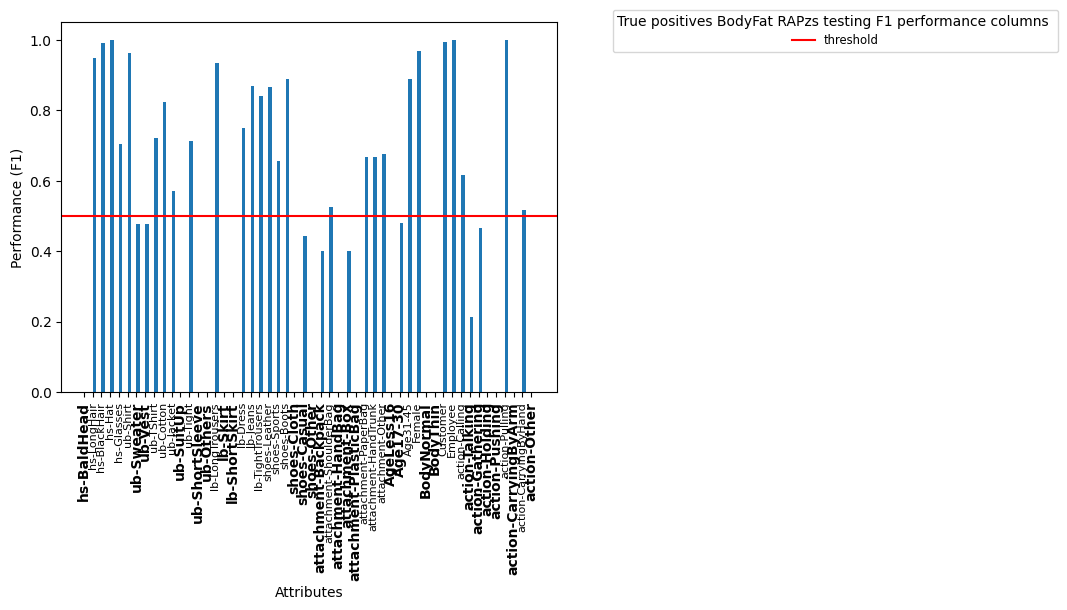

In [16]:
listF1TP = calculateF1Metric(listAttributesRAPzsWithoutAttribute, dfTestingRAPzsIdentititesTP)
tittle='True positives '+attributeToAnalyze+' RAPzs testing F1 performance columns '
threshold=0.5
plotBarF1Performance(listAttributesRAPzsWithoutAttribute, listF1TP, threshold, attributeToAnalyze, tittle)

/home/paa/.conda/envs/rethinking/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


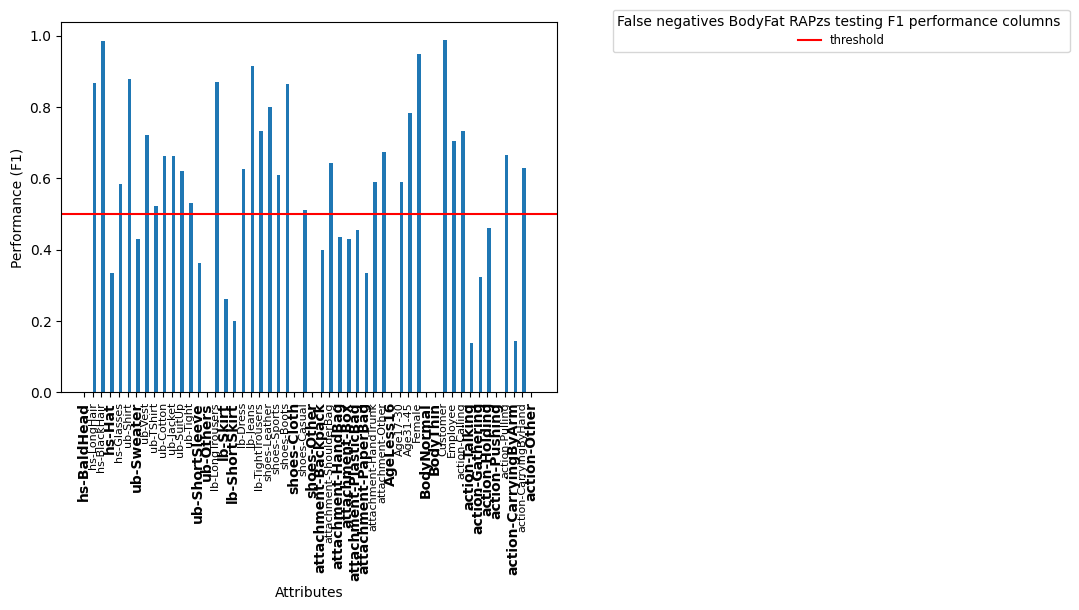

In [17]:
listF1FN = calculateF1Metric(listAttributesRAPzsWithoutAttribute, dfTestingRAPzsIdentititesFN)
tittle='False negatives '+attributeToAnalyze+' RAPzs testing F1 performance columns '
threshold=0.5
plotBarF1Performance(listAttributesRAPzsWithoutAttribute, listF1FN, threshold, attributeToAnalyze, tittle)

In [ ]:
##mirar la media de esto por ejemplo

/home/paa/.conda/envs/rethinking/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


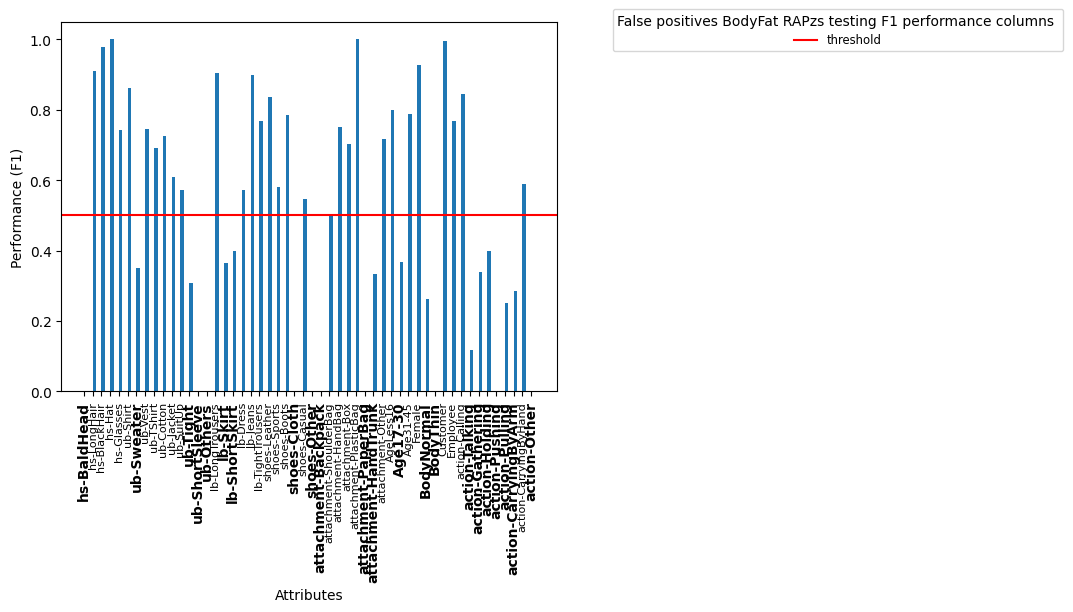

In [18]:
listF1FP = calculateF1Metric(listAttributesRAPzsWithoutAttribute, dfTestingRAPzsIdentititesFP)
tittle='False positives '+attributeToAnalyze+' RAPzs testing F1 performance columns '
threshold=0.5
plotBarF1Performance(listAttributesRAPzsWithoutAttribute, listF1FP, threshold, attributeToAnalyze, tittle)

In [19]:
import seaborn as sns

In [20]:
dfForCorrelation = pd.DataFrame(columns=['columns', 'TP', 'FN', 'FP'])

dfForCorrelation['columns'] = listAttributesRAPzsWithoutAttribute
dfForCorrelation['TP'] = listF1TP
dfForCorrelation['FN'] = listF1FN
dfForCorrelation['FP'] = listF1FP

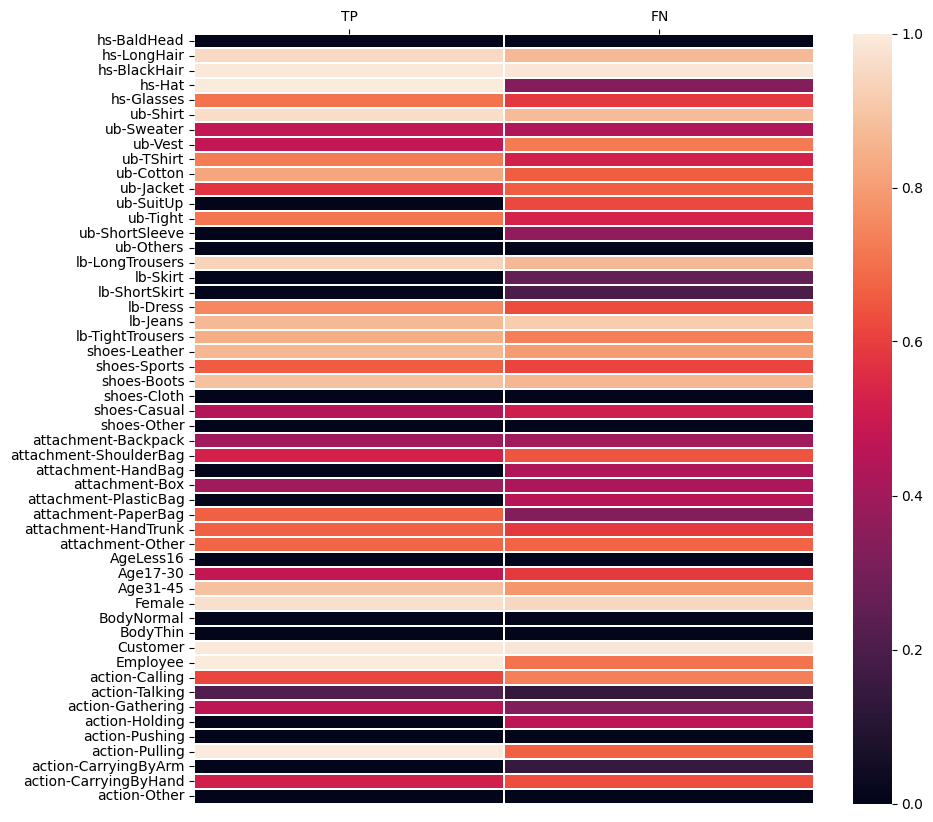

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dfForCorrelation[['TP','FN']], linewidth=0.2, xticklabels=['TP','FN'], yticklabels=listAttributesRAPzsWithoutAttribute, ax=ax)
ax.xaxis.tick_top()

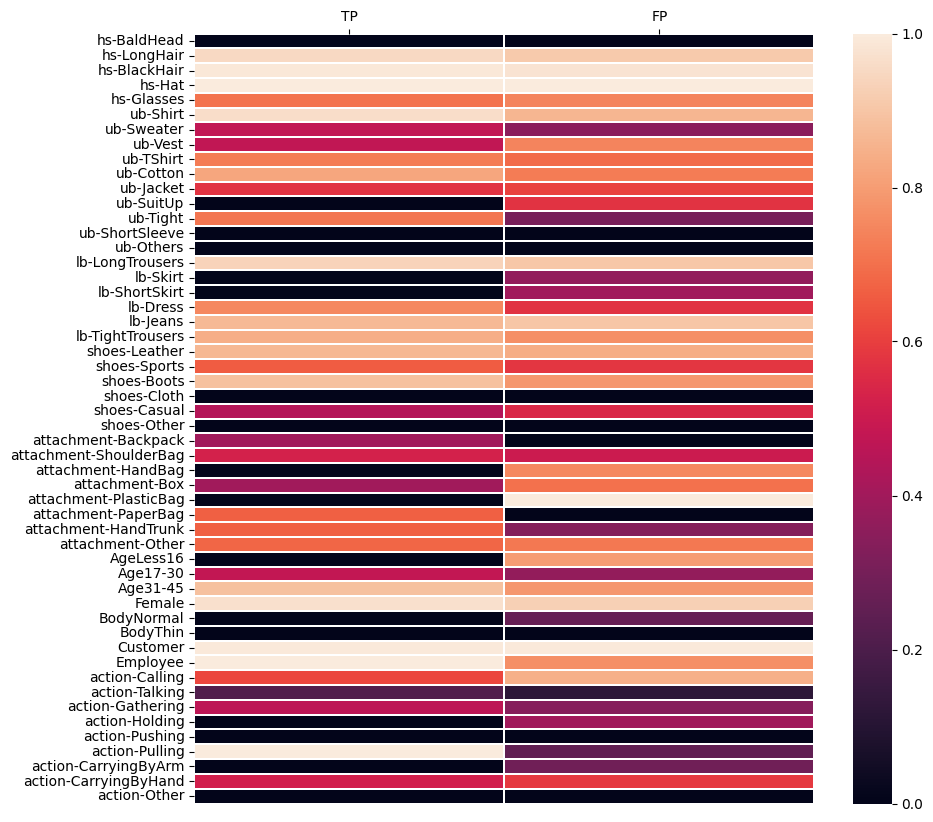

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dfForCorrelation[['TP','FP']], linewidth=0.2, xticklabels=['TP','FP'], yticklabels=listAttributesRAPzsWithoutAttribute, ax=ax)
ax.xaxis.tick_top()

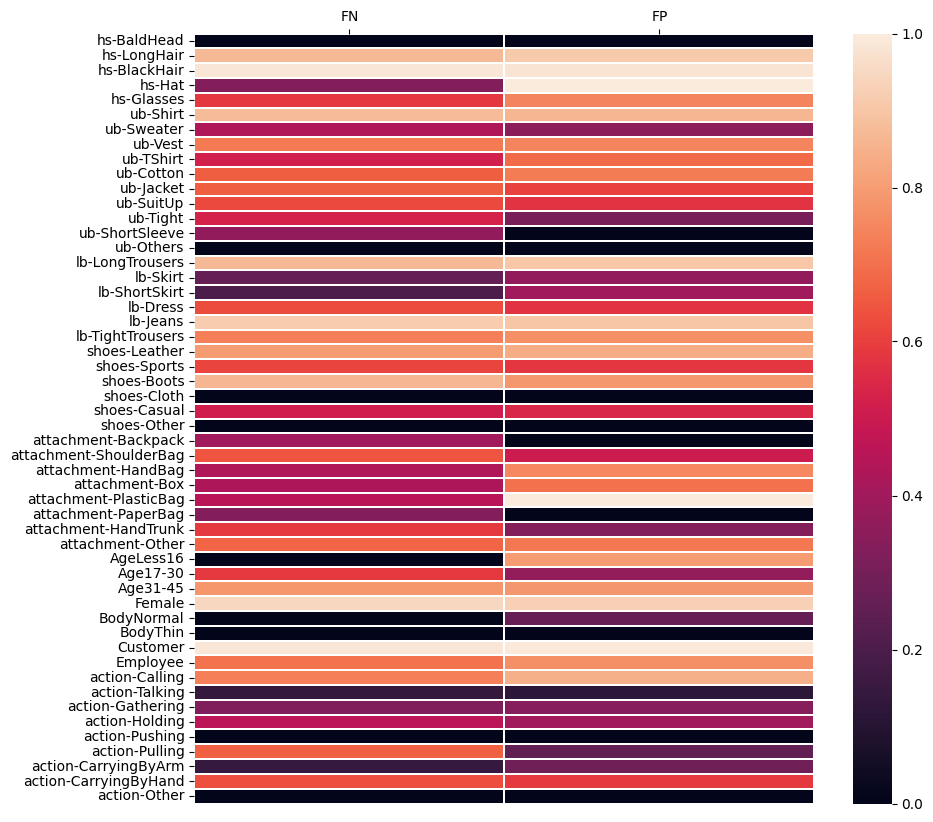

In [23]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dfForCorrelation[['FN','FP']], linewidth=0.2, xticklabels=['FN','FP'], yticklabels=listAttributesRAPzsWithoutAttribute, ax=ax)
ax.xaxis.tick_top()